## Linear Regression Equations

$$y = \theta_{0} + \theta_{1}*x_{1} + \theta_{2}*x_{2} + ... $$

- Vectorized form:

$$ y = h_{\theta}(x) = \theta \cdot x $$

- Vectors can be repersented as column vectors, which are 2D arrays with a single column. In which case the formula is:

$$ y = \theta^{T}x $$

## MSE of Linear Regression

$$ \text{MSE}(\theta) = \text{MSE}(X, h_{\theta})= \frac{1}{m} \sum_{i=1}^{m} (\theta^{T} x^{i} - y^{i})^2 $$

## The Normal Equation

$$ \theta = (X^{T} X)^{-1} X^{T} y $$

- This gives the minimized values of weights in a closed form, given that the inverse is possible

In [1]:
# Generating a linear dataset
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

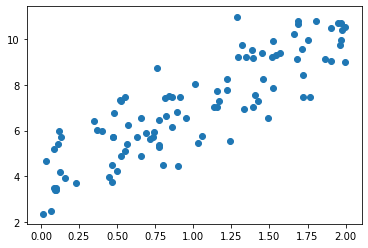

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

In [10]:
# Computing the theta (weights using the normal equation)

# Add a bias
X_b = np.c_[np.ones((100, 1)), X] # Add x0 = 1 to each instance

#? Why do we need to add a bias to each x
print(X_b[0])

[1.         0.74468292]


In [11]:
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [13]:
theta # As you can the that the weights are close to 4 and 3, but the noise added some in accuracies

array([[3.88988053],
       [3.16999776]])

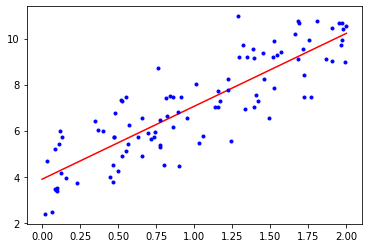

In [32]:
# Ploting the line
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # Add x0 = 2

y_pred = X_new_b.dot(theta) # you have to work out the dimentions first the do the dot product

plt.plot(X_new, y_pred, 'r-')
plt.plot(X, y, 'b.')
plt.show()

## Linear Regression in Scikit-Learn

In [33]:
from sklearn.linear_model import LinearRegression

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # As you can these are the same as we calculated above

(array([3.88988053]), array([[3.16999776]]))

In [36]:
lin_reg.predict(X_new) # also the same 2 y-vals that we calculated

array([[ 3.88988053],
       [10.22987605]])

## Comutational complexity

- The computational complexity for computing an inverse matrix is very slow, especially if the matrix size is very large.